In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from PIL import Image
import pytesseract
import os
import cv2
import matplotlib.pyplot as plt
import textdistance
%matplotlib inline

In [2]:
train_info_path = "../data/train_info.csv"
test_info_path = "../data/test_info.csv"

train_images_path = "../data/train/"
test_images_path = "../data/test/"
train_info = pd.read_csv(train_info_path)
test_info = pd.read_csv(test_info_path)

In [3]:
def plot_image(img_path):
    img = cv2.imread(img_path)
#     print("Shape of the captcha ",img.shape)
    plt.imshow(img)

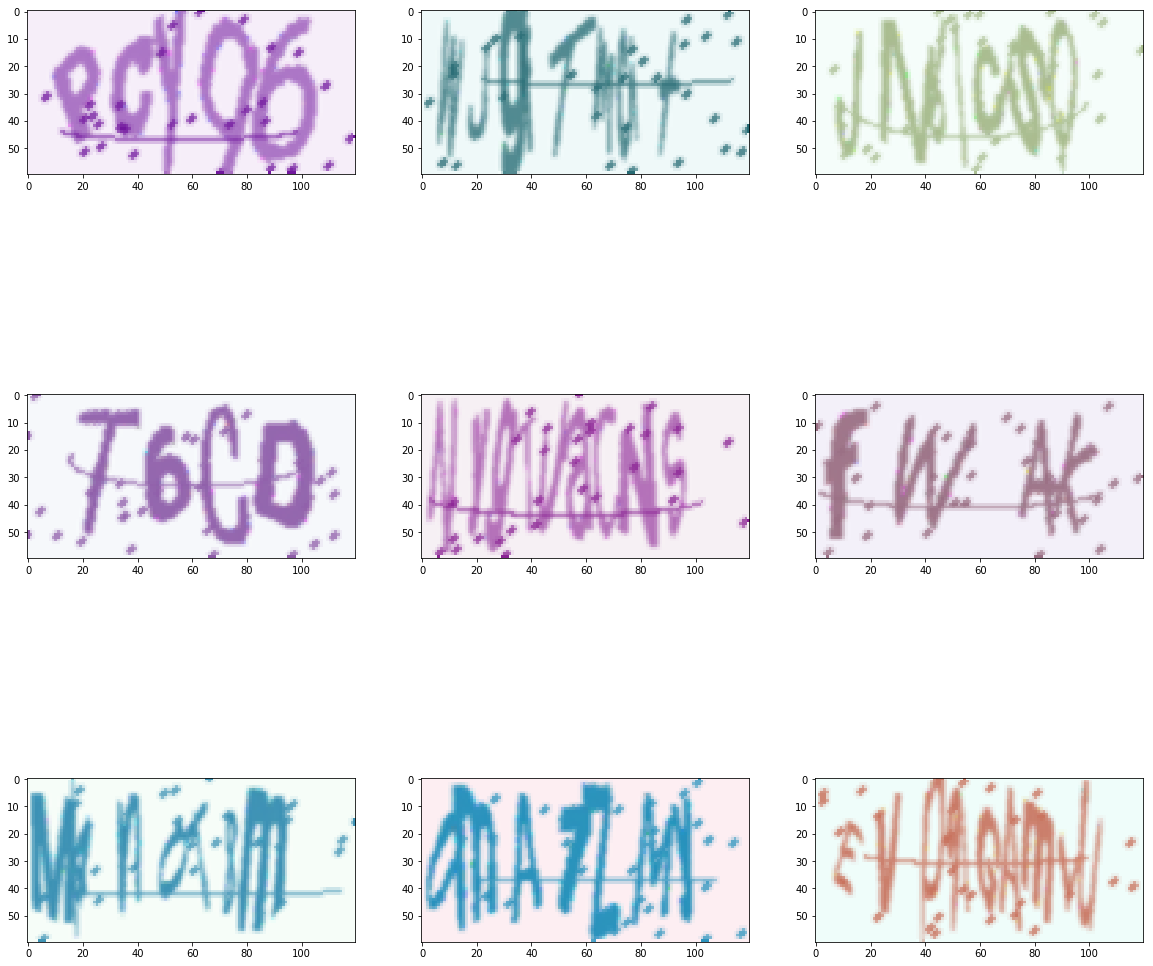

In [4]:
fig=plt.figure(figsize=(20,20))
columns = 3
rows = 3
for i in range(1, columns*rows +1):
    img = train_images_path + train_info['filename'][i]
    fig.add_subplot(rows, columns, i)
    plot_image(img)
plt.show()


In [5]:
X_train, X_val= train_test_split(train_info, test_size=0.2, random_state=42)

In [6]:
labels = []
all_filenames = []

for index,rows in train_info.iterrows():

    i = rows['filename']
    img_path = train_images_path + i
    label = pytesseract.image_to_string(Image.open(img_path))
    #Removing garbage characters
    label = label.replace("\x0c","")
    label = label.replace("\n","")
    labels.append(label)
    all_filenames.append(i)
    print(f'{str(index+1)+"/" + str(train_info.shape[0])}\r',end="")
    
    

labels = np.asarray(labels)
all_filenames = np.asarray(all_filenames)


submission = pd.DataFrame()
submission['filename'] = all_filenames
submission['label'] = labels

In [7]:
def cal_lshtein_score(s_true,s_pred):
    if type(s_pred) == type(1.0):
        return 0
    score = textdistance.levenshtein.normalized_similarity(s_true,s_pred)                        
    return score

In [8]:
lst_scores = []
for idx in range(0,len(train_info)):
    lst_scores.append(cal_lshtein_score(train_info['label'][idx],submission['label'][idx]))

mean_lst_score = np.mean(lst_scores)

print("The mean of normalised Levenshtein Similarity score is " ,mean_lst_score)

The mean of normalised Levenshtein Similarity score is  0.001994087301587302


In [9]:
labels = []
all_filenames = []

for index,rows in test_info.iterrows():

    i = rows['filename']
    img_path = test_images_path + i
    label = pytesseract.image_to_string(Image.open(img_path))
    #Removing garbage characters
    label = label.replace("\x0c","")
    label = label.replace("\n","")
    labels.append(label)
    all_filenames.append(i)
    print(f'{str(index+1)+"/" + str(test_info.shape[0])}\r',end="")

labels = np.asarray(labels)
all_filenames = np.asarray(all_filenames)


submission_df = pd.DataFrame()
submission_df['filename'] = all_filenames
submission_df['label'] = labels

In [10]:
submission_df.to_csv('submission.csv', index=False)

In [23]:
# for index,rows in train_info.iterrows():

#     i = rows['filename']
#     img_path = train_images_path + i
#     label = pytesseract.image_to_string(Image.open(img_path))
#     if label.strip() !='':
#         break

In [24]:
# print(pytesseract.image_to_string(Image.open(img_path)))

In [25]:
# Image.open(img_path)